**Task 2:**

Implementation of K-Means Clustering in Python using Loan data set.

1. The data set is uploaded in MS.Teams. Download it.
3. Apply K-Means algorithm on the data set for K=3 clusters.
4. Use Elbow method to identify numbers of cluster.

imports

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

loading dataset

In [30]:
data = pd.read_csv("/content/Mall_Customers.csv")

data exploration

In [31]:
data.head(5)

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [32]:
data.shape

(200, 5)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [34]:
data.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [35]:
print(data.isna().sum(), "\n")
print(f"sum of null values => {data.isna().sum().sum()}")

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64 

sum of null values => 0


In [36]:
# dropping customerid, genre, age
data = data.drop(["CustomerID","Genre","Age"], axis=1)

k means clustering

In [37]:
x = data.values
wcss = []

# 10 times
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init="k-means++", random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [38]:
print(wcss)

[269981.28, 181363.59595959593, 106348.37306211122, 73679.78903948836, 44448.4554479337, 37265.86520484346, 30259.65720728547, 25095.70320999756, 21830.041978049434, 20736.679938924128]


wcss plot

Text(0, 0.5, 'wcss')

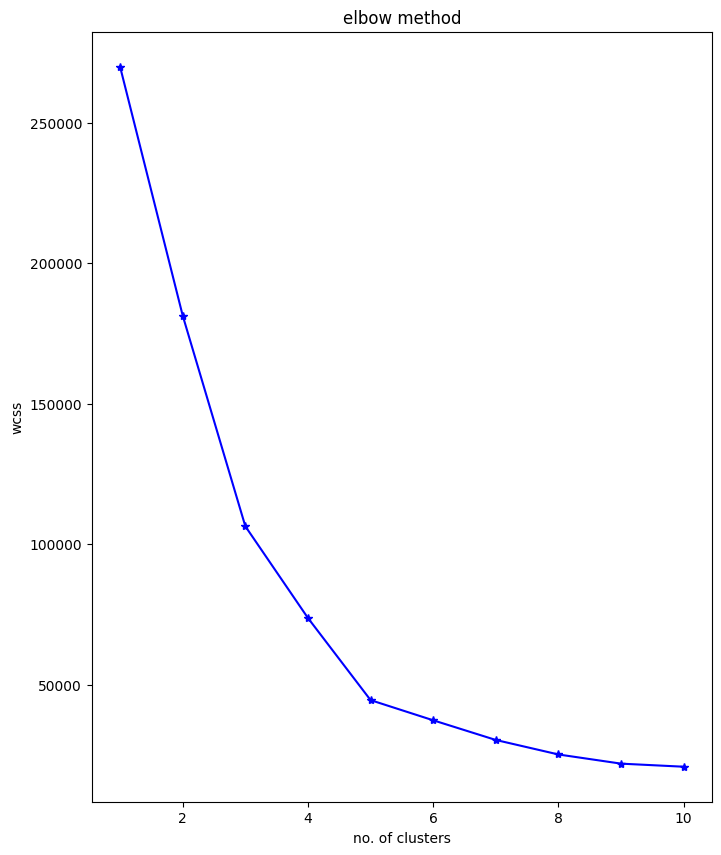

In [39]:
plt.figure(figsize=(8, 10))
k = range(1, 11)

plt.plot(k, wcss, color="blue", marker="*")
plt.title("elbow method")
plt.xlabel("no. of clusters")
plt.ylabel("wcss")

- best k value is 5

kmeans for best k

In [40]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=0)

y_pred = kmeans.fit_predict(x)
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [41]:
# kmeans prediction
print(y_pred)
# cluster centers
print(centroids)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]
[[88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]


plot the points

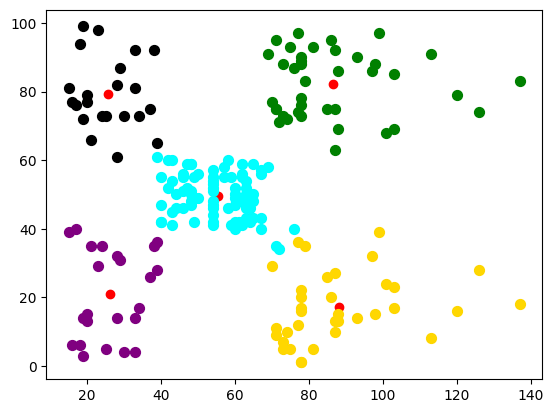

In [42]:
plt.scatter(x[:, 0], x[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], color="red", label="centroids")
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], color="gold", label="cluster no 1", s=50)
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], color="cyan", label="cluster no 2", s=50)
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], color="green", label="cluster no 3", s=50)
plt.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], color="black", label="cluster no 4", s=50)
plt.scatter(x[y_pred == 4, 0], x[y_pred == 4, 1], color="purple", label="cluster no 5", s=50)